In [72]:
#import libraries
import numpy as np
import pandas as pd

#import standard operations
import operator

#import visualisation library
import matplotlib.pyplot as plt
import seaborn as sns
#sns.set(color_codes=True)
#import the warnings
import warnings

# Imort Linear Model
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
################################################################################
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

#
y_pred=logreg.predict(X_test)
################################################################################

# Import train test split
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict, train_test_split

#import std scalar(CLASSIFICATION)
from sklearn.preprocessing import StandardScaler

#import statsmodels (statistical model)
import statsmodels.formula.api as smf
import statsmodels.api as sm

from statsmodels.sandbox.regression.predstd import wls_prediction_std

#using scikit learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

#import metrics
from statsmodels.tools.eval_measures import rmse

#import polinamial features
from sklearn.preprocessing import PolynomialFeatures

# Import the Train Test Split capability from sk-learn
from sklearn.model_selection import train_test_split 

#import linear model(CLASSIFICATION)
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# import the metrics(CLASSIFICATION)
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score,roc_curve, auc

# Import the metrics
from sklearn.metrics import mean_squared_error, r2_score

#import
import scipy.stats as stats
import pylab

#import warnings
import warnings

#import necessary libraries to draw multiclas ROC curve
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp

#notebook configurations
%matplotlib inline
sns.set(color_codes=True)
warnings.filterwarnings('ignore')

In [22]:
#read the data available 
afr_crisis_df = pd.read_csv('african_crises.csv')
afr_crisis_df

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1054,70,ZWE,Zimbabwe,2009,1,354.800000,1,1,0.0,-7.670000,1,1,0,crisis
1055,70,ZWE,Zimbabwe,2010,0,378.200000,1,1,0.0,3.217000,1,0,0,no_crisis
1056,70,ZWE,Zimbabwe,2011,0,361.900000,1,1,0.0,4.920000,1,0,0,no_crisis
1057,70,ZWE,Zimbabwe,2012,0,361.900000,1,1,0.0,3.720000,1,0,0,no_crisis


In [5]:
afr_crisis_df.head(100)

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,5.226400e-02,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,5.279800e-02,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,5.227400e-02,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,5.168000e-02,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,5.130800e-02,0,0,0.0,-3.848561,0,0,0,no_crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,AGO,Angola,1931,0,3.100000e-08,0,0,0.0,0.000000,0,0,0,no_crisis
96,2,AGO,Angola,1932,0,3.310000e-08,0,0,0.0,-2.247191,0,0,0,no_crisis
97,2,AGO,Angola,1933,0,2.130000e-08,0,0,0.0,2.298851,0,0,0,no_crisis
98,2,AGO,Angola,1934,0,2.220000e-08,0,0,0.0,3.370787,0,0,0,no_crisis


In [6]:
#to check for a gap, line, or data type mismatch
afr_crisis_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
case                               1059 non-null int64
cc3                                1059 non-null object
country                            1059 non-null object
year                               1059 non-null int64
systemic_crisis                    1059 non-null int64
exch_usd                           1059 non-null float64
domestic_debt_in_default           1059 non-null int64
sovereign_external_debt_default    1059 non-null int64
gdp_weighted_default               1059 non-null float64
inflation_annual_cpi               1059 non-null float64
independence                       1059 non-null int64
currency_crises                    1059 non-null int64
inflation_crises                   1059 non-null int64
banking_crisis                     1059 non-null object
dtypes: float64(3), int64(8), object(3)
memory usage: 116.0+ KB


In [17]:
#to get statistics of numerical data
afr_crisis_df.loc[:,['systemic_crisis','exch_usd','gdp_weighted_default','inflation_annual_cpi','independence','currency_crises','inflation_crises']].describe()
afr_crisis_df.loc[:,['systemic_crisis','exch_usd','gdp_weighted_default','inflation_annual_cpi','independence','currency_crises','inflation_crises']].describe().style.set_caption('Dataframe statistics')\
    .background_gradient(cmap='viridis')

,systemic_crisis,exch_usd,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises
count,1059,1059,1059,1059,1059,1059,1059
mean,0.0774315,43.1408,0.00640227,20848.9,0.776204,0.1322,0.129367
std,0.267401,111.475,0.0435716,675727,0.416984,0.349847,0.335765
min,0,0,0,-28.5021,0,0,0
25%,0,0.19535,0,2.08616,1,0,0
50%,0,0.8684,0,5.76233,1,0,0
75%,0,8.46275,0,11.644,1,0,0
max,1,744.306,0.4,2.19897e+07,1,2,1


In [8]:
#to check the countries featured in the dataset
afr_crisis_df.country.unique()

array(['Algeria', 'Angola', 'Central African Republic', 'Ivory Coast',
       'Egypt', 'Kenya', 'Mauritius', 'Morocco', 'Nigeria',
       'South Africa', 'Tunisia', 'Zambia', 'Zimbabwe'], dtype=object)

In [9]:
#to check on the banking crisis and how many times it occured
afr_crisis_df["banking_crisis"].value_counts()

#by this we can see that that there are 94 instances of crisis that occured within the years from the above mentioned countries

no_crisis    965
crisis        94
Name: banking_crisis, dtype: int64

In [10]:
#to count number of rows for each country
afr_crisis_df.country.value_counts()

Egypt                       155
South Africa                114
Zimbabwe                     90
Algeria                      85
Angola                       77
Tunisia                      75
Morocco                      75
Zambia                       72
Mauritius                    68
Kenya                        67
Ivory Coast                  63
Nigeria                      60
Central African Republic     58
Name: country, dtype: int64

In [11]:
afr_crisis_df.year.unique()

array([1870, 1871, 1872, 1873, 1874, 1875, 1876, 1877, 1878, 1879, 1880,
       1881, 1882, 1883, 1884, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1968, 1969, 1970, 1971, 1972, 1973,
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984,
       1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995,
       1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006,
       2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1962, 1963, 1964, 1965, 1966, 1967, 1860,
       1861, 1862, 1863, 1864, 1865, 1866, 1867, 1868, 1869, 1885, 1886,
       1887, 1888, 1889, 1890, 1891, 1892, 1893, 1894, 1895, 1896, 1897,
       1898, 1899, 1900, 1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908,
       1909, 1910, 1911, 1912, 1913, 1914, 1915, 19

In [12]:
afr_crisis_df.year.value_counts()

1973    13
1975    13
1992    13
1957    13
1980    13
        ..
1896     1
1897     1
1898     1
1899     1
1860     1
Name: year, Length: 155, dtype: int64

In [13]:
#to filter the crisis only data 
afr_crisis_df[afr_crisis_df['banking_crisis'] == 'crisis']

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,5.226400e-02,0,0,0.00,3.441456e+00,0,0,0,crisis
60,1,DZA,Algeria,1990,1,1.219080e+01,0,0,0.00,9.272000e+00,1,1,0,crisis
61,1,DZA,Algeria,1991,1,2.139190e+01,0,1,0.23,2.590000e+01,1,1,1,crisis
62,1,DZA,Algeria,1992,1,2.278140e+01,0,1,0.23,3.170000e+01,1,0,1,crisis
139,2,AGO,Angola,1992,0,5.500000e-07,1,1,0.00,2.990970e+02,1,1,1,crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1050,70,ZWE,Zimbabwe,2005,1,8.460000e-22,1,1,0.00,5.858444e+02,1,1,1,crisis
1051,70,ZWE,Zimbabwe,2006,1,3.000000e-19,1,1,0.00,1.281114e+03,1,1,1,crisis
1052,70,ZWE,Zimbabwe,2007,1,1.900000e-16,1,1,0.00,6.627989e+04,1,1,1,crisis
1053,70,ZWE,Zimbabwe,2008,1,2.000000e-03,1,1,0.00,2.198970e+07,1,1,1,crisis


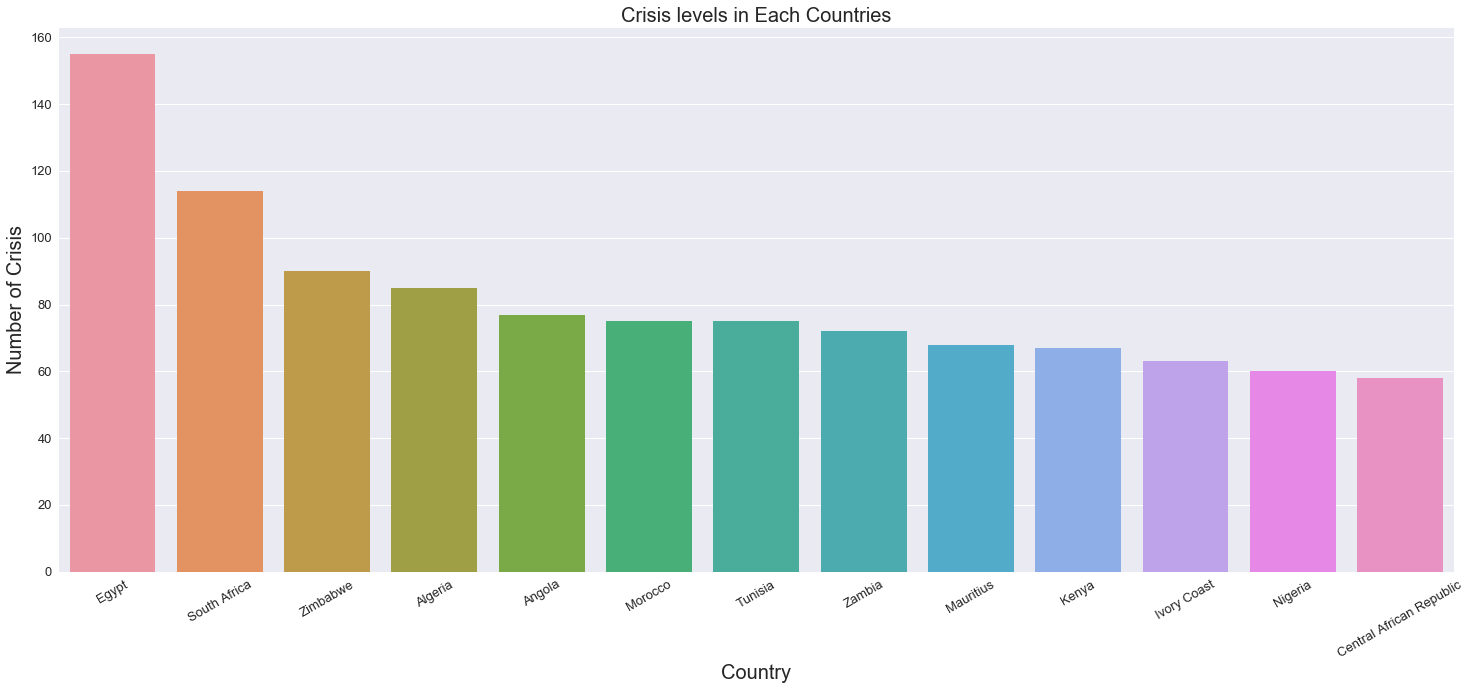

In [39]:
#Plotting a bar graph of the crisis number in each country
country_count  = afr_crisis_df['country'].value_counts()
country_count = country_count[:15,]
plt.figure(figsize=(25,10))
sns.barplot(country_count.index, country_count.values, alpha=1)
plt.xticks(rotation= 30,fontsize=13)
plt.yticks(rotation= 0,fontsize=13)
plt.title('Crisis levels in Each Countries',fontsize=20)
plt.ylabel('Number of Crisis', fontsize=20)
plt.xlabel('Country', fontsize=20)
plt.show()

In [16]:
temp= afr_crisis_df [(afr_crisis_df["inflation_annual_cpi"] >= 0) & (afr_crisis_df['banking_crisis']=='crisis')]
temp

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,5.226400e-02,0,0,0.00,3.441456e+00,0,0,0,crisis
60,1,DZA,Algeria,1990,1,1.219080e+01,0,0,0.00,9.272000e+00,1,1,0,crisis
61,1,DZA,Algeria,1991,1,2.139190e+01,0,1,0.23,2.590000e+01,1,1,1,crisis
62,1,DZA,Algeria,1992,1,2.278140e+01,0,1,0.23,3.170000e+01,1,0,1,crisis
139,2,AGO,Angola,1992,0,5.500000e-07,1,1,0.00,2.990970e+02,1,1,1,crisis
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,70,ZWE,Zimbabwe,2004,1,5.600000e-23,1,1,0.00,1.327468e+02,1,1,1,crisis
1050,70,ZWE,Zimbabwe,2005,1,8.460000e-22,1,1,0.00,5.858444e+02,1,1,1,crisis
1051,70,ZWE,Zimbabwe,2006,1,3.000000e-19,1,1,0.00,1.281114e+03,1,1,1,crisis
1052,70,ZWE,Zimbabwe,2007,1,1.900000e-16,1,1,0.00,6.627989e+04,1,1,1,crisis


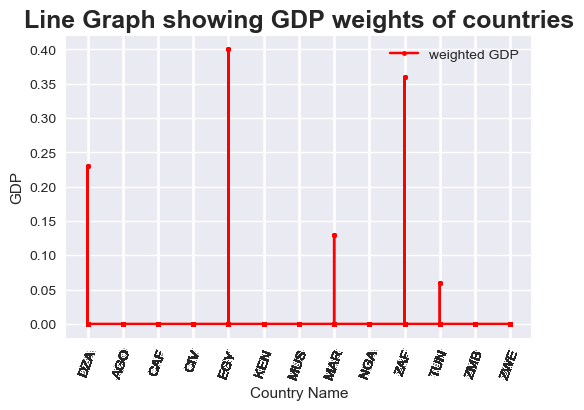

In [46]:
#Create plot for one county first


plt.figure(figsize = (6, 4), dpi =100)

#Plot the graph
#plt.plot(x-axis, y-axis)
#use the shorthand to format the lines
plt.plot(afr_crisis_df['cc3'], afr_crisis_df['gdp_weighted_default'], label = 'weighted GDP', color = 'red', marker = '.', linestyle = '-')

#Fix the ticks on the axes
plt.xticks(afr_crisis_df['cc3'],rotation=70)

#Add title
plt.title('Line Graph showing GDP weights of countries', fontdict={'fontweight':'bold', 'fontsize': 18})

#Add axes labels
plt.xlabel('Country Name')
plt.ylabel('GDP')

#Add legend
plt.legend()

#Save the visual

#Show plot
plt.show()

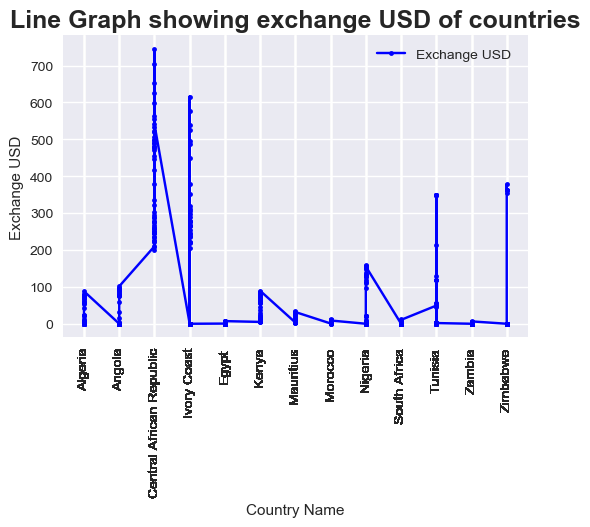

In [41]:
#Create plot for one county first


plt.figure(figsize = (6, 4), dpi =100)

#Plot the graph
#plt.plot(x-axis, y-axis)
#use the shorthand to format the lines
plt.plot(afr_crisis_df['country'], afr_crisis_df['exch_usd'], label = 'Exchange USD ', color = 'blue', marker = '.', linestyle = '-')

#Fix the ticks on the axes
plt.xticks(afr_crisis_df['country'],rotation=90)

#Add title
plt.title('Line Graph showing exchange USD of countries', fontdict={'fontweight':'bold', 'fontsize': 18})

#Add axes labels
plt.xlabel('Country Name')
plt.ylabel('Exchange USD')

#Add legend
plt.legend()

#Save the visual

#Show plot
plt.show()

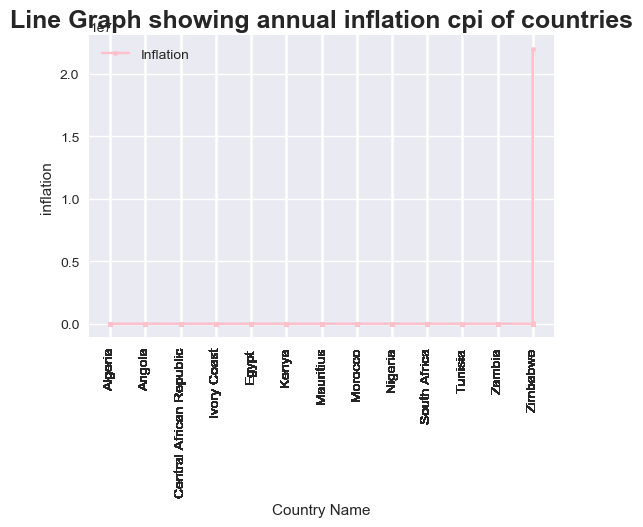

In [42]:
#Create plot for one county first


plt.figure(figsize = (6, 4), dpi =100)

#Plot the graph
#plt.plot(x-axis, y-axis)
#use the shorthand to format the lines

plt.plot(afr_crisis_df['country'], afr_crisis_df['inflation_annual_cpi'], label = 'Inflation', color = 'pink', marker = '.', linestyle = '-')
#mother to child transmission')#using the shorthand

#Fix the ticks on the axes
plt.xticks(afr_crisis_df['country'],rotation=90)

#Add title
plt.title('Line Graph showing annual inflation cpi of countries', fontdict={'fontweight':'bold', 'fontsize': 18})

#Add axes labels
plt.xlabel('Country Name')
plt.ylabel('inflation')

#Add legend
plt.legend()

#Save the visual

#Show plot
plt.show()

In [17]:
sample= afr_crisis_df [(afr_crisis_df["independence"] == 1) & (afr_crisis_df['banking_crisis']=='crisis')]
sample.head(50)

,case,cc3,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
60,1,DZA,Algeria,1990,1,1.219080e+01,0,0,0.00,9.272000,1,1,0,crisis
61,1,DZA,Algeria,1991,1,2.139190e+01,0,1,0.23,25.900000,1,1,1,crisis
62,1,DZA,Algeria,1992,1,2.278140e+01,0,1,0.23,31.700000,1,0,1,crisis
139,2,AGO,Angola,1992,0,5.500000e-07,1,1,0.00,299.097000,1,1,1,crisis
140,2,AGO,Angola,1993,0,6.500000e-06,1,1,0.00,1379.476000,1,1,1,crisis
141,2,AGO,Angola,1994,0,5.092620e-04,1,1,0.00,949.771000,1,1,1,crisis
142,2,AGO,Angola,1995,0,5.692000e-03,1,1,0.00,2672.230000,1,2,1,crisis
143,2,AGO,Angola,1996,0,2.019940e-01,1,1,0.00,4146.010000,1,1,1,crisis
144,2,AGO,Angola,1997,0,2.623760e-01,1,1,0.00,221.492000,1,1,1,crisis
145,2,AGO,Angola,1998,0,6.965000e-01,1,1,0.00,107.429000,1,1,1,crisis


In [18]:
sample["banking_crisis"].value_counts()


crisis    93
Name: banking_crisis, dtype: int64

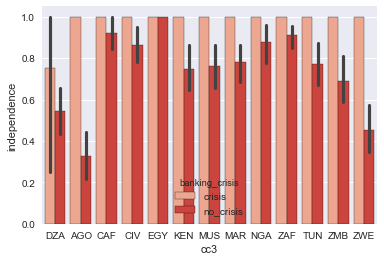

In [23]:
#to see if most of the banking crisis happened before or after independence
sns.barplot(x = 'cc3', y = 'independence', hue = 'banking_crisis', data = afr_crisis_df,
            palette = 'Reds', edgecolor = 'black')

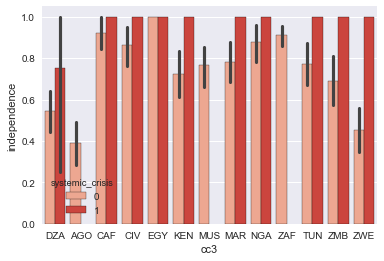

In [24]:
#to see if most of the systemic crisis happened before or after independence
sns.barplot(x = 'cc3', y = 'independence', hue = 'systemic_crisis', data = afr_crisis_df,
            palette = 'Reds', edgecolor = 'black')

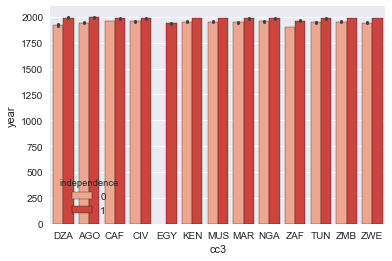

In [25]:
#to see if the earlier a country got its independence the higher the chances of higher crisis
sns.barplot(x = 'cc3', y = 'year', hue = 'independence', data = afr_crisis_df,
            palette = 'Reds', edgecolor = 'black')

In [ ]:
#to locate level of inflation and wheather it was during or after inflation
sns.barplot(x = 'cc3', y = 'independence', hue = 'inflation_annual_cpi', data = afr_crisis_df,
            palette = 'Reds', edgecolor = 'black')

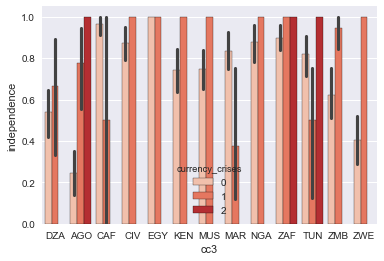

In [3]:
sns.barplot(x = 'cc3', y = 'independence', hue = 'currency_crises', data = afr_crisis_df,
            palette = 'Reds', edgecolor = 'black')

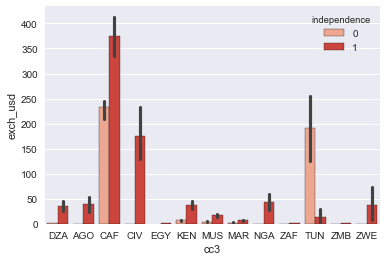

In [3]:
sns.barplot(x = 'cc3', y = 'exch_usd', hue = 'independence', data = afr_crisis_df,
            palette = 'Reds', edgecolor = 'black')

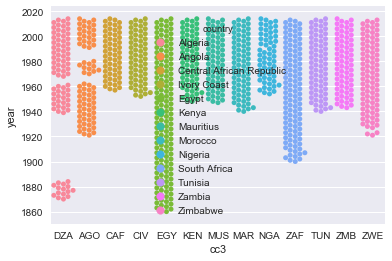

In [28]:
sns.swarmplot(x="cc3", y="year", data=afr_crisis_df, hue="country")

# MACHINE LEARNING MODELS 

## CLASSIFICATION 

In [43]:
#x = supermarket_till_transactions_df[["SHOP_WEEKDAY","SHOP_HOUR","QUANTITY","SPEND"]]
#y = supermarket_till_transactions_df["BASKET_SIZE"]

x = afr_crisis_df[["exch_usd","gdp_weighted_default","inflation_annual_cpi","currency_crises"]]
y = afr_crisis_df["banking_crisis"]

In [44]:
#STANDARDIZE FEATURES
scaler = StandardScaler()
x_std = scaler.fit_transform(x)

In [45]:
#using sklearn
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

#### Random forest

In [46]:
#create model with 100 trees
random_forest_model = RandomForestClassifier(n_estimators=100,
                               bootstrap = True,
                               max_features = 'sqrt')

random_forest_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [47]:
random_forest_pred = random_forest_model.predict(x_test)
# review predictions
random_forest_pred

array(['no_crisis', 'no_crisis', 'no_crisis', 'no_crisis', 'no_crisis',
       'no_crisis', 'no_crisis', 'no_crisis', 'no_crisis', 'no_crisis',
       'crisis', 'no_crisis', 'no_crisis', 'no_crisis', 'no_crisis',
       'no_crisis', 'no_crisis', 'no_crisis', 'no_crisis', 'no_crisis',
       'no_crisis', 'no_crisis', 'no_crisis', 'no_crisis', 'no_crisis',
       'no_crisis', 'no_crisis', 'no_crisis', 'no_crisis', 'no_crisis',
       'no_crisis', 'no_crisis', 'no_crisis', 'no_crisis', 'crisis',
       'no_crisis', 'no_crisis', 'no_crisis', 'no_crisis', 'crisis',
       'no_crisis', 'no_crisis', 'no_crisis', 'no_crisis', 'no_crisis',
       'no_crisis', 'no_crisis', 'no_crisis', 'no_crisis', 'no_crisis',
       'no_crisis', 'no_crisis', 'no_crisis', 'no_crisis', 'no_crisis',
       'no_crisis', 'no_crisis', 'no_crisis', 'no_crisis', 'crisis',
       'no_crisis', 'crisis', 'no_crisis', 'no_crisis', 'no_crisis',
       'crisis', 'no_crisis', 'no_crisis', 'no_crisis', 'no_crisis',
       'no

In [35]:
print("Accuracy:",metrics.accuracy_score(y_test, random_forest_pred))

Accuracy: 0.9150943396226415


### precise, recall, F-Measure and support (Recall to be used in measure of accuracy where we try to avoid 0.99)
### (support is the for the samples classifies as no_crisis, crisis)

In [36]:
print(classification_report(y_test, random_forest_pred))

             precision    recall  f1-score   support

     crisis       0.67      0.36      0.47        33
  no_crisis       0.93      0.98      0.95       285

avg / total       0.90      0.92      0.90       318



In [37]:
random_forest_confusion_matrix = confusion_matrix(y_test, random_forest_pred)
print(random_forest_confusion_matrix)

[[ 12  21]
 [  6 279]]


# KNN

In [48]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [49]:
knn_pred = knn_model.predict(x_test)
knn_pred

array(['crisis', 'no_crisis', 'no_crisis', 'no_crisis', 'no_crisis',
       'no_crisis', 'no_crisis', 'no_crisis', 'no_crisis', 'no_crisis',
       'crisis', 'no_crisis', 'no_crisis', 'no_crisis', 'no_crisis',
       'no_crisis', 'no_crisis', 'no_crisis', 'no_crisis', 'no_crisis',
       'no_crisis', 'crisis', 'no_crisis', 'no_crisis', 'no_crisis',
       'no_crisis', 'no_crisis', 'no_crisis', 'no_crisis', 'no_crisis',
       'no_crisis', 'no_crisis', 'crisis', 'no_crisis', 'crisis',
       'no_crisis', 'no_crisis', 'no_crisis', 'no_crisis', 'crisis',
       'crisis', 'no_crisis', 'no_crisis', 'no_crisis', 'no_crisis',
       'no_crisis', 'no_crisis', 'no_crisis', 'no_crisis', 'no_crisis',
       'no_crisis', 'no_crisis', 'no_crisis', 'no_crisis', 'no_crisis',
       'no_crisis', 'no_crisis', 'no_crisis', 'no_crisis', 'no_crisis',
       'no_crisis', 'no_crisis', 'no_crisis', 'no_crisis', 'no_crisis',
       'no_crisis', 'no_crisis', 'no_crisis', 'no_crisis', 'no_crisis',
       'no_cr

In [50]:
print("Accuracy:",metrics.accuracy_score(y_test, knn_pred))

Accuracy: 0.89937106918239


In [40]:
print(classification_report(y_test, knn_pred))

             precision    recall  f1-score   support

     crisis       0.52      0.52      0.52        33
  no_crisis       0.94      0.94      0.94       285

avg / total       0.90      0.90      0.90       318



In [41]:
knn_confusion_matrix = confusion_matrix(y_test,knn_pred)
print(knn_confusion_matrix)

[[ 17  16]
 [ 16 269]]


# CLASSIFICATION (systemic CRISIS)

In [52]:
x = afr_crisis_df[["exch_usd","gdp_weighted_default","inflation_annual_cpi","currency_crises"]]
y = afr_crisis_df["systemic_crisis"]

In [53]:
#STANDARDIZE FEATURES
scaler = StandardScaler()
x_std = scaler.fit_transform(x)

In [54]:
#using sklearn
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

#### Random forest

In [55]:
#create model with 100 trees
random_forest_model = RandomForestClassifier(n_estimators=100,
                               bootstrap = True,
                               max_features = 'sqrt')

random_forest_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [56]:
random_forest_pred = random_forest_model.predict(x_test)
# review predictions
random_forest_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [57]:
print("Accuracy:",metrics.accuracy_score(y_test, random_forest_pred))

Accuracy: 0.9119496855345912


### precise, recall, F-Measure and support (Recall to be used in measure of accuracy where we try to avoid 0.99)
### (support is the for the samples classifies as 0, 1)

In [51]:
print(classification_report(y_test, random_forest_pred))

             precision    recall  f1-score   support

          0       0.93      0.98      0.95       289
          1       0.54      0.24      0.33        29

avg / total       0.89      0.91      0.90       318



In [52]:
random_forest_confusion_matrix = confusion_matrix(y_test, random_forest_pred)
print(random_forest_confusion_matrix)

[[283   6]
 [ 22   7]]


## KNN

In [58]:
knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [59]:
knn_pred = knn_model.predict(x_test)
knn_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,

In [60]:
print("Accuracy:",metrics.accuracy_score(y_test, knn_pred))

Accuracy: 0.8742138364779874


In [55]:
print(classification_report(y_test, knn_pred))

             precision    recall  f1-score   support

          0       0.93      0.93      0.93       289
          1       0.31      0.31      0.31        29

avg / total       0.87      0.87      0.87       318



In [56]:
knn_confusion_matrix = confusion_matrix(y_test,knn_pred)
print(knn_confusion_matrix)

[[269  20]
 [ 20   9]]


# Banking crisis Prediction - Using Logistic Regression

In [61]:
x = afr_crisis_df[["exch_usd","gdp_weighted_default","inflation_annual_cpi","currency_crises"]]
y = afr_crisis_df["banking_crisis"]

#### Using entire dataset (default)

In [62]:
# Fit (train) the Logistic Regression classifier
lg_clf = linear_model.LogisticRegression(C=1e40, solver='newton-cg')
lg_fitted_model = lg_clf.fit(x, y)

In [63]:
# Predict
lg_prediction_result = lg_fitted_model.predict([(1,18,2,300)])
lg_prediction_result

array(['crisis'], dtype=object)

**Using the entire dataset (with standard scaler and One Vs Rest Classifier)**
1. Standard Scalar
2. One Vs Rest Classifier

In [64]:
# Standarize features
scaler = StandardScaler()
X_std = scaler.fit_transform(x)

In [65]:
# Create one-vs-rest logistic regression object
logistic_regression_clf = LogisticRegression(random_state=0, multi_class='ovr')

In [66]:
# Train model
logistic_regression_model = logistic_regression_clf.fit(X_std, y)

In [67]:
# Create new observation
new_observation = [[1, 18, 2, 300]]

In [68]:
# Predict class
logistic_regression_model.predict(new_observation)

array(['crisis'], dtype=object)

In [69]:
# View predicted probabilities
logistic_regression_model.predict_proba(new_observation)

array([[1.00000000e+00, 3.62673963e-58]])

#### Splitting the data using train_test_split

In [70]:
# Using sklearn
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)
sklearn_logistic_regression_model = LogisticRegression()
sklearn_logistic_regression_model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [73]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.92


#### confusion matrics 

In [137]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[  6  27]
 [  0 285]]


In [139]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

     crisis       1.00      0.18      0.31        33
  no_crisis       0.91      1.00      0.95       285

avg / total       0.92      0.92      0.89       318

